In [1]:
import pandas
import numpy
from sklearn.datasets import load_boston
from termcolor import colored
import matplotlib.pyplot as plt

boston = load_boston()
boston_df = pandas.DataFrame(boston.data, columns = boston.feature_names)
prices = pandas.Series(boston.target)
print(boston.DESCR)
print(boston_df[1:10])

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [2]:
print("\nchecking na values:\n")
print(boston_df.isna().sum())
print("\nBasic Description:\n")
print(boston_df.describe().transpose())



checking na values:

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
dtype: int64

Basic Description:

         count        mean         std        min         25%        50%  \
CRIM     506.0    3.613524    8.601545    0.00632    0.082045    0.25651   
ZN       506.0   11.363636   23.322453    0.00000    0.000000    0.00000   
INDUS    506.0   11.136779    6.860353    0.46000    5.190000    9.69000   
CHAS     506.0    0.069170    0.253994    0.00000    0.000000    0.00000   
NOX      506.0    0.554695    0.115878    0.38500    0.449000    0.53800   
RM       506.0    6.284634    0.702617    3.56100    5.885500    6.20850   
AGE      506.0   68.574901   28.148861    2.90000   45.025000   77.50000   
DIS      506.0    3.795043    2.105710    1.12960    2.100175    3.20745   
RAD      506.0    9.549407    8.707259    1.00000    4.000000    5.00000   
TAX      506.0 


Ploting_to_visualize_data_to_understand_nature:



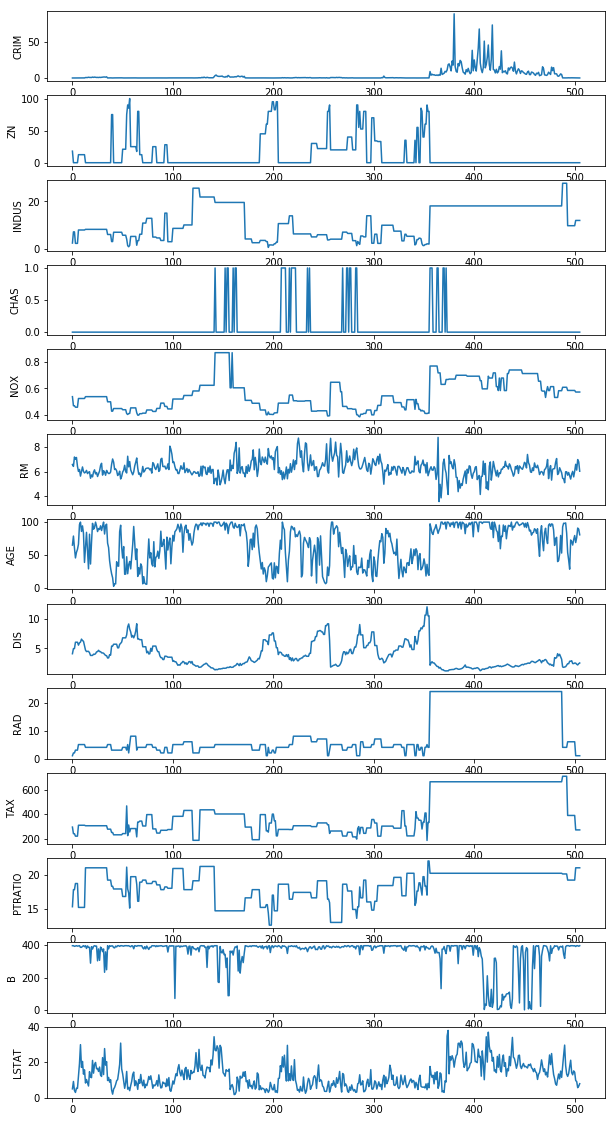

In [3]:
print("\nPloting_to_visualize_data_to_understand_nature:\n")
i = 1
plt.figure(figsize = (10,20))
for col in list(boston_df.columns):
    plt.subplot(13,1,i)
    plt.plot(boston_df[col])
    plt.ylabel(col)
    i = i+1

# Observations 

* PT Ratio, RAD, TAX, CHAS, ZN, NOX, INDUS are discrete variables 
* Rest are continuous
* CRIM is coorelated with RAD, TAX
* RAD, TAX, PT Ratio, AGE, B have some relationship 


MEAN MDEV : 22.532806324110677


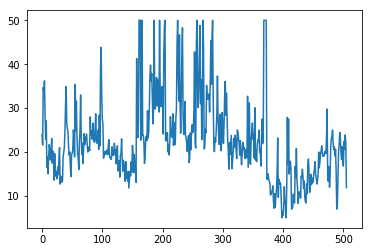

In [4]:
prices.name = "MDEV"
new_boston_df = boston_df.join(prices, how = "left")
prices.plot()
print("MEAN MDEV :",prices.mean())


In [5]:
new_boston_df[1:10]

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MDEV
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
5,0.02985,0.0,2.18,0.0,0.458,6.430,58.7,6.0622,3.0,222.0,18.7,394.12,5.21,28.7
6,0.08829,12.5,7.87,0.0,0.524,6.012,66.6,5.5605,5.0,311.0,15.2,395.60,12.43,22.9
7,0.14455,12.5,7.87,0.0,0.524,6.172,96.1,5.9505,5.0,311.0,15.2,396.90,19.15,27.1
8,0.21124,12.5,7.87,0.0,0.524,5.631,100.0,6.0821,5.0,311.0,15.2,386.63,29.93,16.5
9,0.17004,12.5,7.87,0.0,0.524,6.004,85.9,6.5921,5.0,311.0,15.2,386.71,17.10,18.9


Prices/MDEVs are continuous 


Analysing Coorelation between various variables

             CRIM        ZN     INDUS      CHAS       NOX        RM       AGE  \
CRIM     1.000000 -0.200469  0.406583 -0.055892  0.420972 -0.219247  0.352734   
ZN      -0.200469  1.000000 -0.533828 -0.042697 -0.516604  0.311991 -0.569537   
INDUS    0.406583 -0.533828  1.000000  0.062938  0.763651 -0.391676  0.644779   
CHAS    -0.055892 -0.042697  0.062938  1.000000  0.091203  0.091251  0.086518   
NOX      0.420972 -0.516604  0.763651  0.091203  1.000000 -0.302188  0.731470   
RM      -0.219247  0.311991 -0.391676  0.091251 -0.302188  1.000000 -0.240265   
AGE      0.352734 -0.569537  0.644779  0.086518  0.731470 -0.240265  1.000000   
DIS     -0.379670  0.664408 -0.708027 -0.099176 -0.769230  0.205246 -0.747881   
RAD      0.625505 -0.311948  0.595129 -0.007368  0.611441 -0.209847  0.456022   
TAX      0.582764 -0.314563  0.720760 -0.035587  0.668023 -0.292048  0.506456   
PTRATIO  0.289946 -0.391679  0.383248 -0.121515  0.188933 -

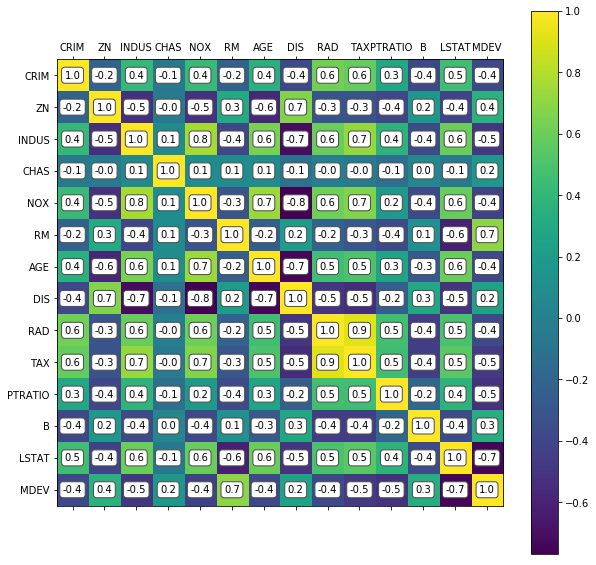

In [6]:
# Corelation Matrix
print("\nAnalysing Coorelation between various variables\n")
corr_matrix = new_boston_df.corr()
print(corr_matrix)

fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111)
cax = ax.matshow(corr_matrix)
fig.colorbar(cax)

for (i, j), z in numpy.ndenumerate(corr_matrix):
    ax.text(j, i, '{:0.1f}'.format(z), ha='center', va='center',
            bbox=dict(boxstyle='round', facecolor='white', edgecolor='0.3'))

ax.set_xticks(numpy.arange(len(new_boston_df.columns)))
ax.set_yticks(numpy.arange(len(new_boston_df.columns)))
ax.set_xticklabels(new_boston_df.columns)
ax.set_yticklabels(new_boston_df.columns)

plt.show()


**observation** 
* Some variables for ex. DIS and INDUS, NOX and DIS, CRIM and RAD etc. are highly coorelated
* Find pairs of Independent variables for which correlation coef >=(0.7) and <=(-0.7) 
* Target Variable MDEV looks highly dependent on LSTAT, RAD, TAX, INDUS, RM

In [7]:
corr_values = corr_matrix.values
names = list(corr_matrix.index)
s1 = list(numpy.argwhere(corr_values > 0.7))
s2 = list(numpy.argwhere(corr_values < -0.7))
pairs = [(names[a[0]],names[a[1]]) for a in s1+s2 if a[0] != a[1]]
pairs

[('INDUS', 'NOX'),
 ('INDUS', 'TAX'),
 ('NOX', 'INDUS'),
 ('NOX', 'AGE'),
 ('AGE', 'NOX'),
 ('RAD', 'TAX'),
 ('TAX', 'INDUS'),
 ('TAX', 'RAD'),
 ('INDUS', 'DIS'),
 ('NOX', 'DIS'),
 ('AGE', 'DIS'),
 ('DIS', 'INDUS'),
 ('DIS', 'NOX'),
 ('DIS', 'AGE'),
 ('LSTAT', 'MDEV'),
 ('MDEV', 'LSTAT')]

# Split dataset into training and testing sets

In [8]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

X_train, X_test, y_train, y_test = train_test_split(boston_df, prices, test_size=0.25, random_state=123)

# A summary function to analyse accuracy metrics
def summary(reg,X,y):
    print(colored("\nR-squared: ","blue"),reg.score(X, y),colored("\nAdj R-Squared: ","blue"),1 - (1-reg.score(X, y))*(len(y)-1)/(len(y)-X.shape[1]-1))
    yhat = reg.predict(X)
    print(colored("Sum of Sq Error: ","blue"),sum((y-yhat)**2))
    print(colored("coef :\n","blue"),reg.coef_)
    print(colored("intercept : ","blue"),reg.intercept_)
    return None


[Tutorial on Python Linear Reg.](https://stackoverflow.com/questions/42033720/python-sklearn-multiple-linear-regression-display-r-squared)

# Fitting the model using all 13 variables

In [9]:
reg = LinearRegression()
X,y = X_train,y_train

reg.fit(X,y)
summary(reg,X,y)


R-squared:  0.7520477761303055 
Adj R-Squared:  0.7432166010335766
Sum of Sq Error:  8103.268611390467
coef :
 [-9.78910352e-02  4.27789348e-02  5.91493507e-02  1.23149832e+00
 -1.54902558e+01  4.35215724e+00 -4.69136797e-04 -1.37720645e+00
  2.82085749e-01 -1.24919445e-02 -9.40011503e-01  6.62260713e-03
 -5.48551054e-01]
intercept :  32.47966480453276


# Fit using CRIM, RM, TAX, LSTAT 

The 4 provided variables without any transformation on variables 
Following the fit analyse whether all the assumptions of Liner Regression are satisfied and valid


In [10]:
reg = LinearRegression()
X,y = X_train[["CRIM","RM","TAX","LSTAT"]],y_train
    
reg.fit(X,y)
summary(reg,X,y)

# Find Residuals for Diagnostic Tests
yhat = reg.predict(X)
residuals = y-yhat


R-squared:  0.6804886316750702 
Adj R-Squared:  0.6770713977892421
Sum of Sq Error:  10441.876267625074
coef :
 [-5.25512474e-02  5.63465754e+00 -4.78190043e-03 -5.33814590e-01]
intercept :  -4.004347845475859


In [16]:
X

,CRIM,RM,TAX,LSTAT
335,0.03961,6.037,224.0,8.01
142,3.32105,5.403,403.0,26.82
170,1.20742,5.875,403.0,14.43
241,0.10612,6.095,300.0,12.40
379,17.86670,6.223,666.0,21.78
367,13.52220,3.863,666.0,13.33
388,14.33370,4.880,666.0,30.62
156,2.44668,5.272,403.0,16.14
433,5.58107,6.436,666.0,16.22
31,1.35472,6.072,307.0,13.04


[Tests for Linear Regression](https://www.statisticssolutions.com/assumptions-of-multiple-linear-regression/)

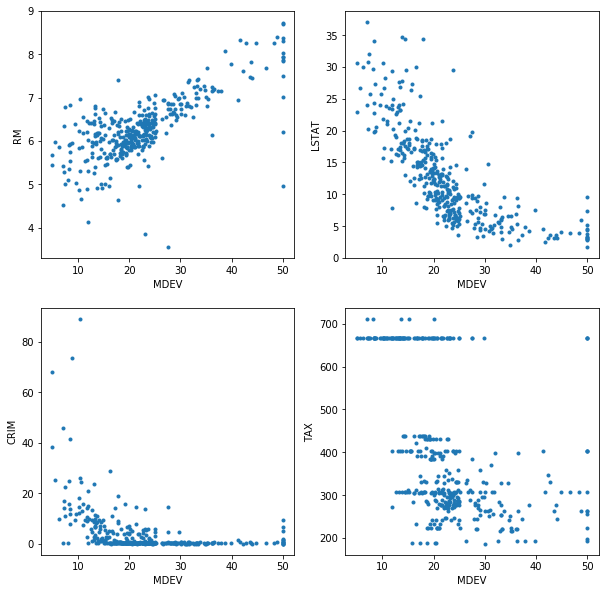

In [13]:
# Test for Linearity
# Linear Relationship between depedent variables and ind variables 

plt.figure(figsize = (10,10))

plt.subplot(221)
plt.scatter(y,X["RM"],marker='.')
plt.xlabel("MDEV")
plt.ylabel("RM")

plt.subplot(222)
plt.scatter(y,X["LSTAT"],marker='.')
plt.xlabel("MDEV")
plt.ylabel("LSTAT")

plt.subplot(223)
plt.scatter(y,X["CRIM"],marker='.')
plt.xlabel("MDEV")
plt.ylabel("CRIM")

plt.subplot(224)
plt.scatter(y,X["TAX"],marker='.')
plt.xlabel("MDEV")
plt.ylabel("TAX")

plt.show()

# Observation

Lstat and RM look good, need a transformation on CRIM, TAX to fit those

(array([  5.,  68., 175.,  84.,  23.,  16.,   3.,   3.,   0.,   2.]),
 array([-2.39253716, -1.55920868, -0.72588019,  0.10744829,  0.94077678,
         1.77410526,  2.60743375,  3.44076223,  4.27409072,  5.1074192 ,
         5.94074769]),
 <a list of 10 Patch objects>)

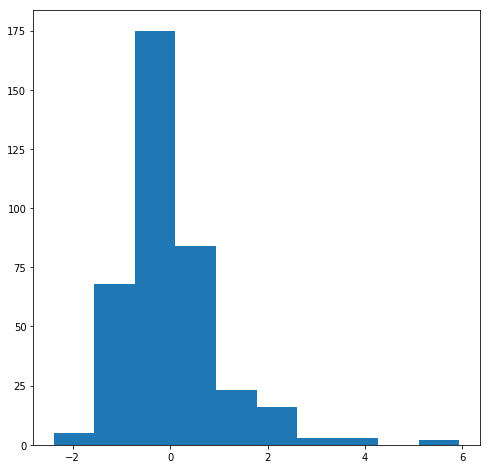

In [14]:
# Test for Normality 
std_r = (residuals-numpy.mean(residuals))/numpy.std(residuals)
norm_r = (residuals - min(residuals))/(max(residuals) - min(residuals))

plt.figure(figsize=(8,8))
plt.hist(std_r, histtype = 'bar')

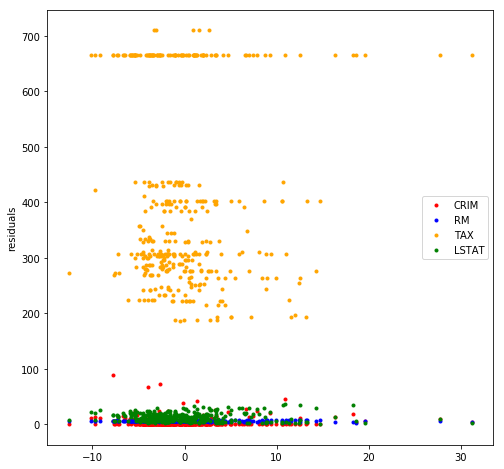

In [15]:
# Test for Independence
plt.figure(figsize=(8,8))
plt.scatter(residuals,X["CRIM"],c = "red",marker = '.')
plt.scatter(residuals,X["RM"], c= "blue",marker = '.')
plt.scatter(residuals,X["TAX"], c = "orange",marker = '.')
plt.scatter(residuals,X["LSTAT"], c = "green",marker = '.')
plt.ylabel("residuals")
plt.legend()
plt.show()


MEAN OF RESIDUALS : -0.0


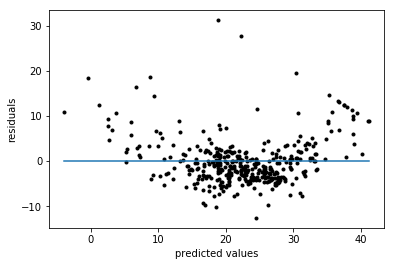

In [18]:
# Test for Homoscedasticity and Linearity
plt.scatter(yhat,residuals,c = 'black',marker='.')
plt.xlabel("predicted values")
plt.ylabel("residuals")

plt.plot(numpy.unique(yhat), numpy.poly1d(numpy.polyfit(yhat, residuals, 1))(numpy.unique(yhat)))

#Mean of Residuals is 0
print("\nMEAN OF RESIDUALS :",round(numpy.mean(residuals),3))

# Observations

* Approx Non Linear relationship between Residuals and Fitted Values
* Ind. Variables TAX is not linearly related with MDEV (target/dependent variable)

# Transformation and Changes to model

CURRENT TRANSFORMATION : *MDEV => ln(MDEV)*

In [18]:
log_y = numpy.log(y)

X,y_log = X_train[["CRIM","RM","TAX","LSTAT"]],log_y

reg.fit(X,log_y)
summary(reg,X,log_y)


R-squared:  0.7437655082225613 
Adj R-Squared:  0.7410250323746742
Sum of Sq Error:  17.017036869902647
coef :
 [-0.00820117  0.15837034 -0.00026704 -0.02959261]
intercept :  2.5485174610798897


R sq and Adj R sq has improved from the previous model as well as sum of sq error has significantly come down, Going ahead with test of assumptions again to check whether all the assumptions are still correct

In [48]:
# Find Residuals for Diagnostic Tests
yhat = reg.predict(X)
residuals = log_y-yhat

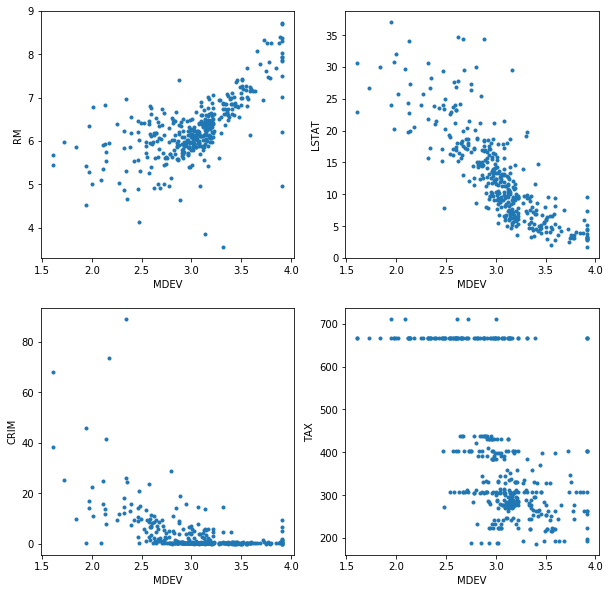

In [19]:
# Test for linearity
plt.figure(figsize = (10,10))

plt.subplot(221)
plt.scatter(log_y,X["RM"],marker='.')
plt.xlabel("MDEV")
plt.ylabel("RM")

plt.subplot(222)
plt.scatter(log_y,X["LSTAT"],marker='.')
plt.xlabel("MDEV")
plt.ylabel("LSTAT")

plt.subplot(223)
plt.scatter(log_y,X["CRIM"],marker='.')
plt.xlabel("MDEV")
plt.ylabel("CRIM")

plt.subplot(224)
plt.scatter(log_y,X["TAX"],marker='.')
plt.xlabel("MDEV")
plt.ylabel("TAX")

plt.show()

(array([  6.,   6.,  19., 127., 131.,  62.,  18.,   4.,   3.,   3.]),
 array([-3.40012585, -2.6105704 , -1.82101495, -1.03145951, -0.24190406,
         0.54765139,  1.33720684,  2.12676229,  2.91631773,  3.70587318,
         4.49542863]),
 <a list of 10 Patch objects>)

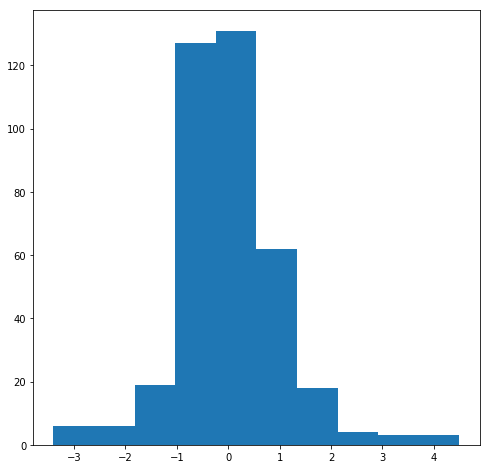

In [50]:
# Test for Normality 
std_r = (residuals-numpy.mean(residuals))/numpy.std(residuals)
norm_r = (residuals - min(residuals))/(max(residuals) - min(residuals))

plt.figure(figsize=(8,8))
plt.hist(std_r, histtype = 'bar')


MEAN OF RESIDUALS : -0.0


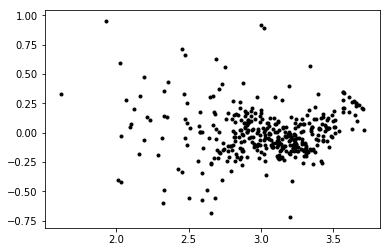

In [54]:
# Test for homoscedasticity and linearity
plt.scatter(yhat,residuals,c = 'black',marker='.')

#Mean of Residuals is 0
print("\nMEAN OF RESIDUALS :",round(numpy.mean(residuals),3))

In [35]:
print("VIF TEST")
from statsmodels.stats.outliers_influence import variance_inflation_factor    

variables = list(range(X.shape[1]))
vif = [variance_inflation_factor(X.iloc[:, variables].values, ix)
               for ix in range(X.iloc[:, variables].shape[1])]
vif_mapped = {name: round(vif[ix],2) for ix,name in enumerate(X.columns)} 
vif_mapped

VIF TEST


{'INDUS': 9.56,
 'PTRATIO': 68.13,
 'RM': 48.77,
 'log_LSTAT': 37.48,
 'NOX': 60.16}

# Modifications Further 

* Tax is a categorical variable with a high vif and low coorelation with MDEV; Removing TAX from the model
* MDEV is still log MDEV 

In [57]:
# Removing Tax
X,y_log = X_train[["CRIM","RM","LSTAT"]],log_y

reg.fit(X,log_y)
summary(reg,X,log_y)


R-squared:  0.7373019519489503 
Adj R-Squared:  0.735200367564542
Sum of Sq Error:  17.4462943623493
coef :
 [-0.01007037  0.15838448 -0.03207149]
intercept :  2.478345397810771


In [60]:
# Test for VIF 

print("VIF TEST")
variables = list(range(X.shape[1]))
vif = [variance_inflation_factor(X.iloc[:, variables].values, ix)
               for ix in range(X.iloc[:, variables].shape[1])]
vif_mapped = {name: round(vif[ix],2) for ix,name in enumerate(X.columns)} 
vif_mapped

VIF TEST


{'CRIM': 1.48, 'RM': 3.44, 'LSTAT': 4.26}

R-sq and Adj R sq hasn't changed significantly, but vif values have come within considerable limit (5)

# New Fit 

Using INDUS, PTRATIO, LSTAT, NOX, RM as the independent variables assumption based on the correlation matrix 

In [29]:
X_train["log_LSTAT"] = numpy.log(X_train["LSTAT"])
X,y_log = X_train[["INDUS","PTRATIO","RM","log_LSTAT","NOX"]],log_y

reg.fit(X,log_y)
summary(reg,X,log_y)


R-squared:  0.7310676685646509 
Adj R-Squared:  0.7274626775266435
Sum of Sq Error:  17.86032539100641
coef :
 [ 0.00177663 -0.03552562  0.10134992 -0.42102529 -0.34695715]
intercept :  4.221748247360753


c:\users\admin\appdata\local\programs\python\python36-32\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [30]:
# Find Residuals for Diagnostic Tests
yhat = reg.predict(X)
residuals = log_y-yhat

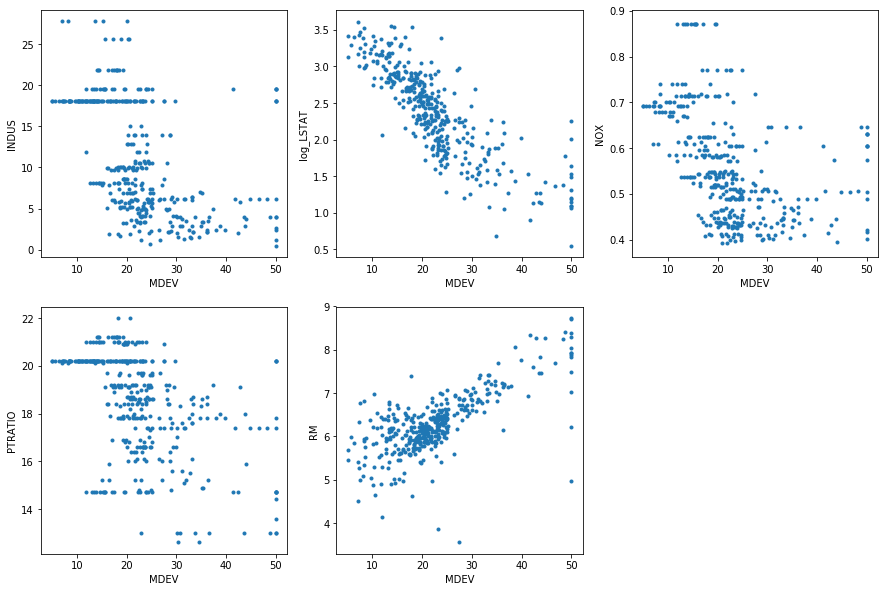

In [31]:
# Test for linearity
plt.figure(figsize = (15,10))

plt.subplot(231)
plt.scatter(y,X["INDUS"],marker='.')
plt.xlabel("MDEV")
plt.ylabel("INDUS")

plt.subplot(232)
plt.scatter(y,X["log_LSTAT"],marker='.')
plt.xlabel("MDEV")
plt.ylabel("log_LSTAT")

plt.subplot(233)
plt.scatter(y,X["NOX"],marker='.')
plt.xlabel("MDEV")
plt.ylabel("NOX")

plt.subplot(234)
plt.scatter(y,X["PTRATIO"],marker='.')
plt.xlabel("MDEV")
plt.ylabel("PTRATIO")

plt.subplot(235)
plt.scatter(y,X["RM"],marker='.')
plt.xlabel("MDEV")
plt.ylabel("RM")

plt.show()

(array([  3.,   4.,  11.,  27., 140., 125.,  54.,  10.,   4.,   1.]),
 array([-4.34223555, -3.48704213, -2.63184871, -1.77665529, -0.92146186,
        -0.06626844,  0.78892498,  1.64411841,  2.49931183,  3.35450525,
         4.20969868]),
 <a list of 10 Patch objects>)

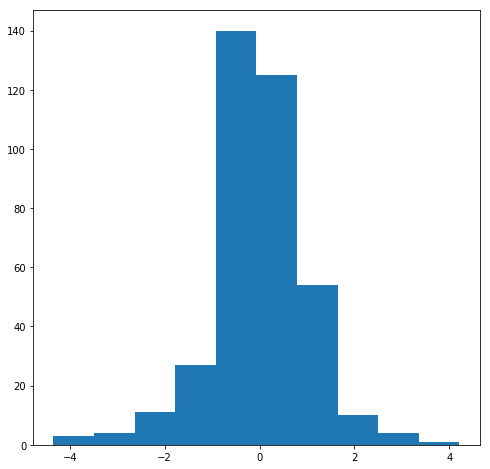

In [32]:
# Test for Normality 
std_r = (residuals-numpy.mean(residuals))/numpy.std(residuals)
norm_r = (residuals - min(residuals))/(max(residuals) - min(residuals))

plt.figure(figsize=(8,8))
plt.hist(std_r, histtype = 'bar')


MEAN OF RESIDUALS : -0.0


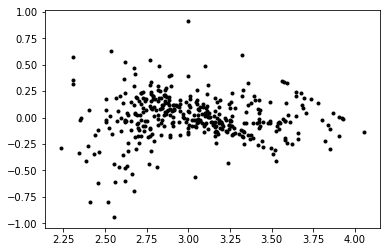

In [33]:
# Test for homoscedasticity and linearity
plt.scatter(yhat,residuals,c = 'black',marker='.')

#Mean of Residuals is 0
print("\nMEAN OF RESIDUALS :",round(numpy.mean(residuals),3))

In [36]:
# Test for VIF 

print("VIF TEST")
variables = list(range(X.shape[1]))
vif = [variance_inflation_factor(X.iloc[:, variables].values, ix)
               for ix in range(X.iloc[:, variables].shape[1])]
vif_mapped = {name: round(vif[ix],2) for ix,name in enumerate(X.columns)} 
vif_mapped

VIF TEST


{'INDUS': 9.56,
 'PTRATIO': 68.13,
 'RM': 48.77,
 'log_LSTAT': 37.48,
 'NOX': 60.16}

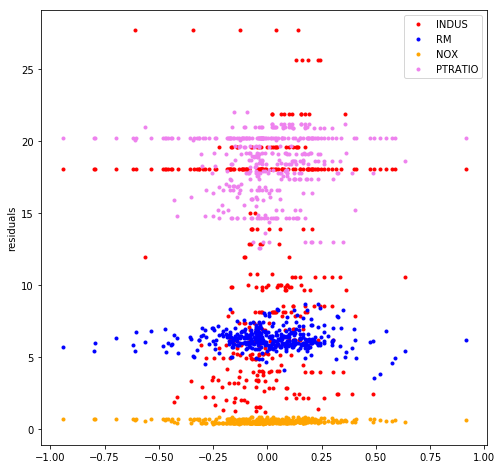

In [38]:
# Test for Independence
plt.figure(figsize=(8,8))
plt.scatter(residuals,X["INDUS"],c = "red",marker = '.')
plt.scatter(residuals,X["RM"], c= "blue",marker = '.')
plt.scatter(residuals,X["NOX"], c = "orange",marker = '.')
plt.scatter(residuals,X["PTRATIO"], c = "violet",marker = '.')
plt.ylabel("residuals")
plt.legend()
plt.show()

Conclusion: High VIF values, Not a good fit 

In [97]:
## Reverting back to the best fit 
log_y = numpy.log(y)

X,y_log = X_train[["CRIM","RM","LSTAT"]],log_y

reg.fit(X,log_y)
summary(reg,X,log_y)


R-squared:  0.7373019519489503 
Adj R-Squared:  0.735200367564542
Sum of Sq Error:  17.446294362349295
coef :
 [-0.01007037  0.15838448 -0.03207149]
intercept :  2.47834539781077


In [103]:
# Finding R-sq for the test data 

log_y_test = numpy.log(y_test)
X,y_log = X_test[["CRIM","RM","LSTAT"]],log_y_test

print(reg.score(X,y_log))

0.6369349422906824
